In [1]:
# import necessary libraries
import pandas as pd
import numpy  as np
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display

In [2]:
# load the cleaned dataset
df = pd.read_csv(r'../data/cleaned/movies_data_cleaned.csv')
df.shape

(18, 24)

## KPI Implementation & Analysis
Identify the Best/Worst Performing Movies based Highest Revenue Budget and Profit

In [3]:
# for revenue
df['revenue_rank'] = df['revenue_musd'].rank(ascending=False)
df = df.sort_values(by='revenue_musd', ascending=False)

print(f"""Top 3 movies with highest revenue 
      \n{df[['id','title', 'revenue_musd', 'revenue_rank']].head(3)} 
      \n\n bottom 2 lowest revenue movies:
      \n{df[['id','title', 'revenue_musd', 'revenue_rank']].tail(2)}""")

Top 3 movies with highest revenue 
      
        id              title  revenue_musd  revenue_rank
2    19995             Avatar   2923.706026           1.0
12  299534  Avengers: Endgame   2799.439100           2.0
0      597            Titanic   2264.162353           3.0 
      

 bottom 2 lowest revenue movies:
      
        id                 title  revenue_musd  revenue_rank
14  321612  Beauty and the Beast   1266.115964          17.0
10  260513         Incredibles 2   1243.225667          18.0


In [4]:
#  bugdet
df['budget_rank'] = df.budget_musd.rank(ascending=False)
df = df.sort_values(by='budget_musd', ascending=False)

print(f"""Top 3 movies with highest budget:
      \n{df[['id','title', 'budget_musd', 'budget_rank']].head(3)} 
      \n\n bottom 2 lowest budget movies:
      \n{df[['id','title', 'budget_musd', 'budget_rank']].tail(2)}""")

Top 3 movies with highest budget:
      
        id                     title  budget_musd  budget_rank
12  299534         Avengers: Endgame        356.0          1.0
13  299536    Avengers: Infinity War        300.0          2.5
9   181808  Star Wars: The Last Jedi        300.0          2.5 
      

 bottom 2 lowest budget movies:
      
       id                                         title  budget_musd  \
5  109445                                        Frozen        150.0   
1   12445  Harry Potter and the Deathly Hallows: Part 2        125.0   

   budget_rank  
5         16.0  
1         18.0  


In [5]:
# for profit
df['profit_rank'] = df['profit_musd'].rank(ascending=False)
df = df.sort_values(by='profit_musd', ascending=False)
print(f"""Top 3 movies that generate highest profit:
      \n{df[['id','title', 'profit_musd', 'profit_rank']].head(3)} 
      \n\n bottom 2 lowest profit:
      \n{df[['id','title', 'profit_musd', 'profit_rank']].tail(2)}""")

Top 3 movies that generate highest profit:
      
        id              title  profit_musd  profit_rank
2    19995             Avatar  2686.706026          1.0
12  299534  Avengers: Endgame  2443.439100          2.0
0      597            Titanic  2064.162353          3.0 
      

 bottom 2 lowest profit:
      
        id                     title  profit_musd  profit_rank
10  260513             Incredibles 2  1043.225667         17.0
9   181808  Star Wars: The Last Jedi  1032.698830         18.0


In [6]:
# for return on investement
df['roi'] = df['revenue_musd'] / df['budget_musd']
roi = df[df['budget_musd']>10].sort_values(by='roi', ascending=False)
roi['roi_rank'] = roi['roi'].rank(ascending=False)
print(f"""Top 3 highest performining movies by return on invest and bugdet great than 10M:
      \n{roi[['id','title', 'budget_musd', 'revenue_musd', 'profit_musd', 'roi_rank']].head(3)} 
      \n\n least 2 movies:
      \n{roi[['id','title', 'budget_musd', 'revenue_musd', 'profit_musd', 'roi_rank']].tail(2)}""")

Top 3 highest performining movies by return on invest and bugdet great than 10M:
      
       id           title  budget_musd  revenue_musd  profit_musd  roi_rank
2   19995          Avatar        237.0   2923.706026  2686.706026       1.0
0     597         Titanic        200.0   2264.162353  2064.162353       2.0
6  135397  Jurassic World        150.0   1671.537444  1521.537444       3.0 
      

 least 2 movies:
      
       id                     title  budget_musd  revenue_musd  profit_musd  \
4   99861   Avengers: Age of Ultron        235.0   1405.403694  1170.403694   
9  181808  Star Wars: The Last Jedi        300.0   1332.698830  1032.698830   

   roi_rank  
4      17.0  
9      18.0  


In [7]:
# Based on voting
df['vote_rank'] = df['vote_count'].rank(ascending=False)
df = df.sort_values('vote_count', ascending=False)
print(f"""Top voted movies: 
      \n{df[['id', 'title', 'vote_count', 'vote_rank']].head(3)}""")

Top voted movies: 
      
        id                   title  vote_count  vote_rank
3    24428            The Avengers       34141        1.0
2    19995                  Avatar       32843        2.0
13  299536  Avengers: Infinity War       31165        3.0


In [8]:
# Ratings filters: only movies with >= 10 votes
rated = df[df['vote_count'] >= 10].sort_values('vote_average', ascending=False)
print(f"""Top 3 highest performing movies  by voting more than 10k votes:
      \n{rated[['id', 'title', 'vote_average']].head(3)} 
      \nLeast 2 movies  with lowest rated with vote >= 10M):
      \n{rated[['id', 'title', 'vote_average']].tail(2)}""")


Top 3 highest performing movies  by voting more than 10k votes:
      
        id                                         title  vote_average
12  299534                             Avengers: Endgame         8.238
13  299536                        Avengers: Infinity War         8.235
1    12445  Harry Potter and the Deathly Hallows: Part 2         8.084 
      
Least 2 movies  with lowest rated with vote >= 10M):
      
        id                           title  vote_average
6   135397                  Jurassic World         6.700
16  351286  Jurassic World: Fallen Kingdom         6.538


In [9]:
# Popularity
df['pop_rank'] = df['popularity'].rank(ascending=False)
df = df.sort_values('popularity', ascending=False)
print(f"""Top 3 popularity movies:
      \n{df[['id', 'title', 'popularity', 'pop_rank']].head(3)} 
      \nLeast 2 performing movies by popularity:
      \n{df[['id', 'title', 'popularity', 'pop_rank']].tail(2)}""")

Top 3 popularity movies:
      
      id         title  popularity  pop_rank
3  24428  The Avengers     43.2894       1.0
0    597       Titanic     29.8798       2.0
2  19995        Avatar     24.8656       3.0 
      
Least 2 performing movies by popularity:
      
       id                     title  popularity  pop_rank
9  181808  Star Wars: The Last Jedi      8.4022      17.0
8  168259                 Furious 7      8.0130      18.0


# Franchise vs. Standalone Movie Performance

In [29]:
def analyze_franchises_vs_standalone(data):
        """Compare franchise vs standalone movie performance"""
        print("\n--- Franchise vs Standalone Analysis ---")
        
        # Identify franchise movies
        data['is_franchise'] = data['belongs_to_collection'].notna()
        
        comparison = {}
        metrics = ['revenue_musd', 'roi', 'budget_musd', 'popularity', 'vote_average']
        
        for metric in metrics:
            if metric in data.columns:
                franchise_mean = data[data['is_franchise']][metric].mean()
                standalone_mean = data[~data['is_franchise']][metric].mean()
                comparison[metric] = {
                    'franchise': franchise_mean,
                    'standalone': standalone_mean,
                    'difference': franchise_mean - standalone_mean
                }
        
        # Display results
        for metric, values in comparison.items():
            print(f"\n{metric.upper()}:")
            print(f"  Franchise Mean: {values['franchise']:.2f}")
            print(f"  Standalone Mean: {values['standalone']:.2f}")
            print(f"  Difference: {values['difference']:.2f}")
        
        return comparison

In [30]:
comparison = analyze_franchises_vs_standalone(df)


--- Franchise vs Standalone Analysis ---

REVENUE_MUSD:
  Franchise Mean: 1682.67
  Standalone Mean: 1765.14
  Difference: -82.47

ROI:
  Franchise Mean: 7.99
  Standalone Mean: 9.62
  Difference: -1.62

BUDGET_MUSD:
  Franchise Mean: 218.00
  Standalone Mean: 180.00
  Difference: 38.00

POPULARITY:
  Franchise Mean: 14.67
  Standalone Mean: 21.59
  Difference: -6.91

VOTE_AVERAGE:
  Franchise Mean: 7.39
  Standalone Mean: 7.44
  Difference: -0.05


In [31]:
def successful_franchises(data):
    """Find the most successful movie franchises"""
    if 'belongs_to_collection' not in data.columns:
        return pd.DataFrame()
    
    franchise_data = []
    franchises = data['belongs_to_collection'].dropna().unique()
    
    for franchise in franchises:
        franchise_movies = data[data['belongs_to_collection'] == franchise]
        
        franchise_data.append({
            'franchise': franchise,
            'movie_count': len(franchise_movies),
            'total_budget': franchise_movies['budget_musd'].sum(),
            'mean_budget': franchise_movies['budget_musd'].mean(),
            'total_revenue': franchise_movies['revenue_musd'].sum(),
            'mean_revenue': franchise_movies['revenue_musd'].mean(),
            'mean_rating': franchise_movies['vote_average'].mean(),
        })
    
    franchise_df = pd.DataFrame(franchise_data)
    
    if not franchise_df.empty:
        print("\n--- Most Successful Franchises ---")
        franchise_df.sort_values('total_revenue', ascending=False).head()
    return franchise_df

**5. Find the Most Successful Movie Franchises based on:** 
* Total number of movies in franchise
* Total & Mean Budget
* Total & Mean Revenue
* Mean Rating

In [32]:
successful_franchises(df)


--- Most Successful Franchises ---


,franchise,movie_count,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
0,"{'id': 86311, 'name': 'The Avengers Collection...",4,1111.0,277.75,7776.073348,1944.018337,7.901
1,"{'id': 87096, 'name': 'Avatar Collection', 'po...",1,237.0,237.00,2923.706026,2923.706026,7.594
2,"{'id': 386382, 'name': 'Frozen Collection', 'p...",2,300.0,150.00,2727.902485,1363.951242,7.245
3,"{'id': 1241, 'name': 'Harry Potter Collection'...",1,125.0,125.00,1341.511219,1341.511219,8.084
4,"{'id': 468222, 'name': 'The Incredibles Collec...",1,200.0,200.00,1243.225667,1243.225667,7.456
5,"{'id': 328, 'name': 'Jurassic Park Collection'...",2,320.0,160.00,2982.006481,1491.003241,6.619
6,"{'id': 529892, 'name': 'Black Panther Collecti...",1,200.0,200.00,1349.926083,1349.926083,7.366
7,"{'id': 10, 'name': 'Star Wars Collection', 'po...",2,545.0,272.50,3400.922454,1700.461227,7.010
8,"{'id': 762512, 'name': 'The Lion King (Reboot)...",1,260.0,260.00,1662.020819,1662.020819,7.103
9,"{'id': 9485, 'name': 'The Fast and the Furious...",1,190.0,190.00,1515.400000,1515.400000,7.223


In [33]:
# most Success full franchise movies and directors
succuss = df[['id', 'title', 'collection_name','director', 'budget_musd', 'revenue_musd', 'vote_count', 'roi', 'popularity']].dropna().reset_index()
succuss[['id', 'title', 'collection_name','director']]

,id,title,collection_name,director
0,24428,The Avengers,The Avengers Collection,Joss Whedon
1,19995,Avatar,Avatar Collection,James Cameron
2,299536,Avengers: Infinity War,The Avengers Collection,Joe Russo
3,109445,Frozen,Frozen Collection,Jennifer Lee
4,12445,Harry Potter and the Deathly Hallows: Part 2,Harry Potter Collection,David Yates
5,299534,Avengers: Endgame,The Avengers Collection,Anthony Russo
6,99861,Avengers: Age of Ultron,The Avengers Collection,Joss Whedon
7,260513,Incredibles 2,The Incredibles Collection,Brad Bird
8,135397,Jurassic World,Jurassic Park Collection,Colin Trevorrow
9,284054,Black Panther,Black Panther Collection,Ryan Coogler


Find the Most Successful Directors based on:
- Total Number of Movies Directed
- Total Revenue
- Mean Rating

In [34]:
df.groupby('director')['id'].count().sort_values(ascending=False).head(5)

director
Joss Whedon        2
Jennifer Lee       2
James Cameron      2
Colin Trevorrow    1
Anthony Russo      1
Name: id, dtype: int64

In [35]:
#  BY REVENUE GENERATED
df.groupby('director')['revenue_musd'].sum().sort_values(ascending=False).head(5)

director
James Cameron    5187.868379
Joss Whedon      2924.219209
Anthony Russo    2799.439100
Jennifer Lee     2727.902485
J.J. Abrams      2068.223624
Name: revenue_musd, dtype: float64

In [36]:
dir = df.groupby('director')['id'].count().sort_values(ascending=False).head(5)
dir


director
Joss Whedon        2
Jennifer Lee       2
James Cameron      2
Colin Trevorrow    1
Anthony Russo      1
Name: id, dtype: int64

In [37]:
df.groupby('director')['vote_count'].median().sort_values(ascending=False).head(5)

director
Joe Russo        31165.0
James Cameron    29671.0
Joss Whedon      29006.0
Anthony Russo    26952.0
Ryan Coogler     22965.0
Name: vote_count, dtype: float64

In [46]:
df.isna().sum()

id                       0
title                    0
tagline                  0
release_date             0
genres                   0
belongs_to_collection    2
original_language        0
budget_musd              0
revenue_musd             0
production_companies     0
production_countries     0
vote_count               0
vote_average             0
popularity               0
runtime                  0
overview                 0
spoken_languages         0
poster_path              0
cast                     0
cast_size                0
director                 0
crew_size                0
profit_musd              0
collection_name          2
revenue_rank             0
budget_rank              0
profit_rank              0
roi                      0
vote_rank                0
pop_rank                 0
is_franchise             0
year                     0
primary_genre            0
dtype: int64

## Data Visualization
Use Pandas, Matplotlib to visualize:
- Revenue vs. Budget Trends
- ROI Distribution by Genre
- Popularity vs. Rating
- Yearly Trends in Box Office Performance
- Comparison of Franchise vs. Standalone Success

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ensure datetime and year column
df['year'] = df['release_date'].dt.year

# helper to extract primary genre name from the stored string
def _primary_genre(genre_str):
    if pd.isna(genre_str):
        return np.nan
    m = re.search(r"'name':\s*'([^']+)'", str(genre_str))
    if m:
        return m.group(1)
    parts = str(genre_str).split('|')
    return parts[0].strip() if parts else np.nan

if 'primary_genre' not in df.columns:
    df['primary_genre'] = df['genres'].apply(_primary_genre)

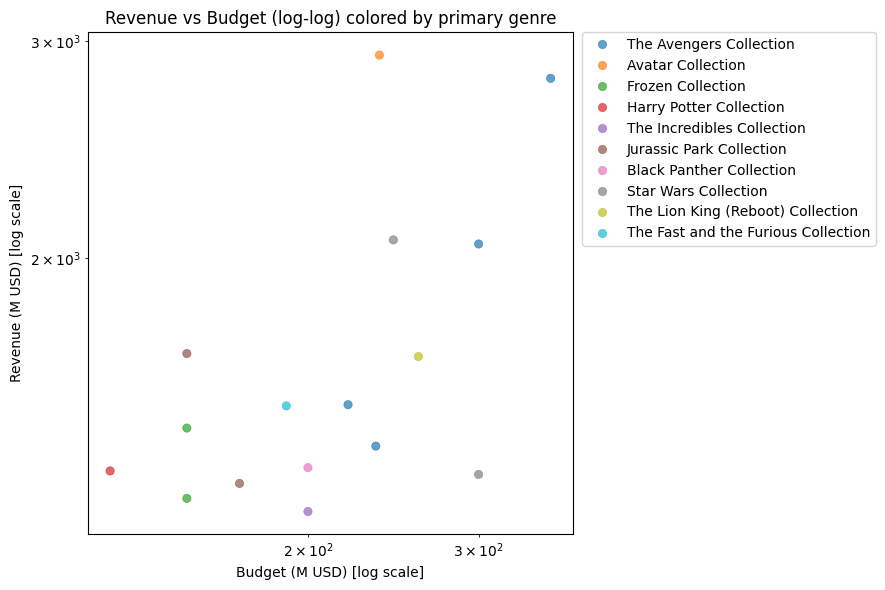

In [48]:
# 1) Revenue vs Budget Trends (log-log scatter)
plt.figure(figsize=(9,6))
plot1 = df[(df['budget_musd'] > 0) & (df['revenue_musd'] > 0)]
sns.scatterplot(
    data=plot1,
    x='budget_musd',
    y='revenue_musd',
    hue='collection_name',
    alpha=0.7,
    edgecolor=None,
    legend='brief'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Budget (M USD) [log scale]')
plt.ylabel('Revenue (M USD) [log scale]')
plt.title('Revenue vs Budget (log-log) colored by primary genre')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

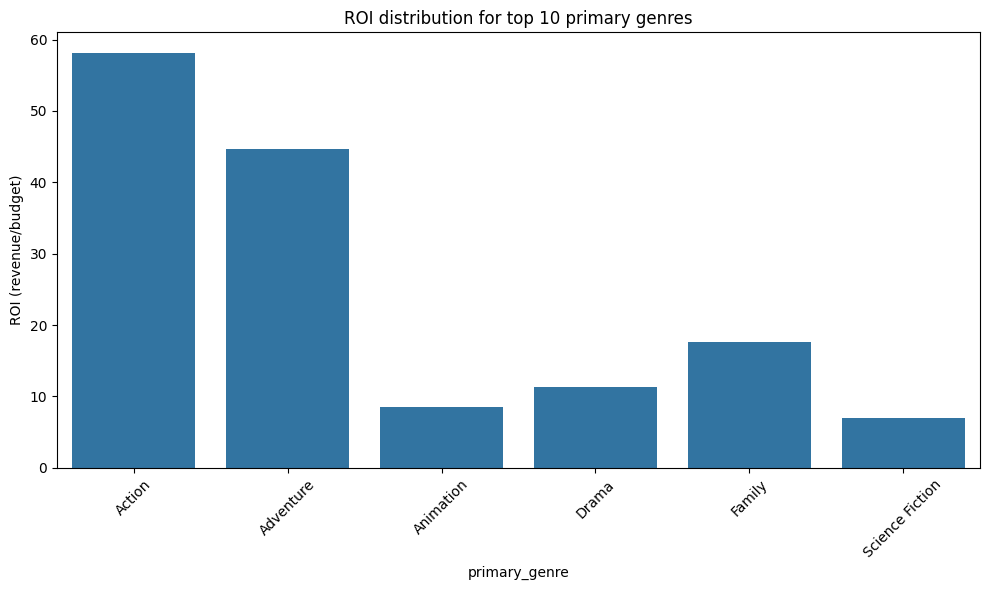

In [63]:
# 2) ROI Distribution by Genre (boxplot for top genres)
# top_genres = df['primary_genre'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(
    data  = pd.DataFrame(df.groupby('primary_genre')['roi'].sum()),
    x='primary_genre',
    y='roi'
)
plt.xticks(rotation=45)
plt.ylabel('ROI (revenue/budget)')
plt.title('ROI distribution for top 10 primary genres')
plt.tight_layout()
plt.show()

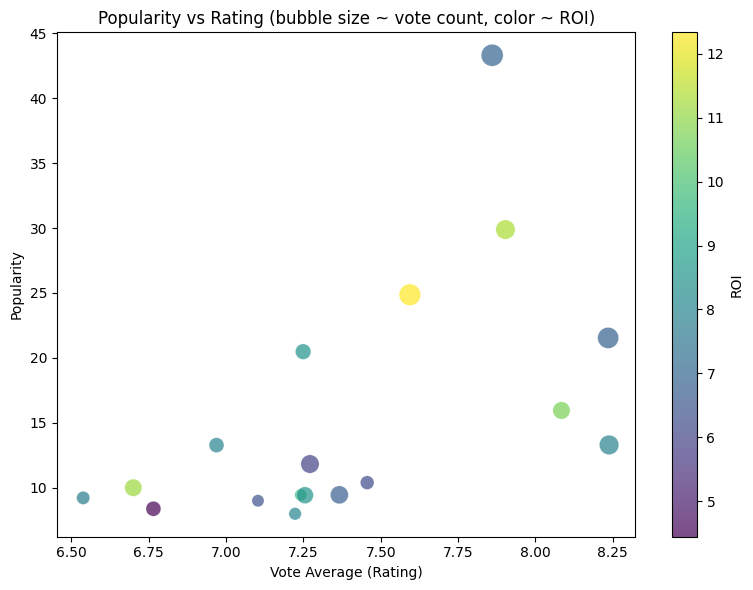

In [ ]:
# 3) Popularity vs Rating (bubble with vote_count size, color by ROI)
plt.figure(figsize=(8,6))
sizes = (df['vote_count'].fillna(0) / (df['vote_count'].max() or 1)) * 250
sc = plt.scatter(
    df['vote_average'],
    df['popularity'],
    s=sizes,
    c=df['roi'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.3
)
cbar = plt.colorbar(sc)
cbar.set_label('ROI')
plt.xlabel('Vote Average (Rating)')
plt.ylabel('Popularity')
plt.title('Popularity vs Rating (bubble size ~ vote count, color ~ ROI)')
plt.tight_layout()
plt.show()

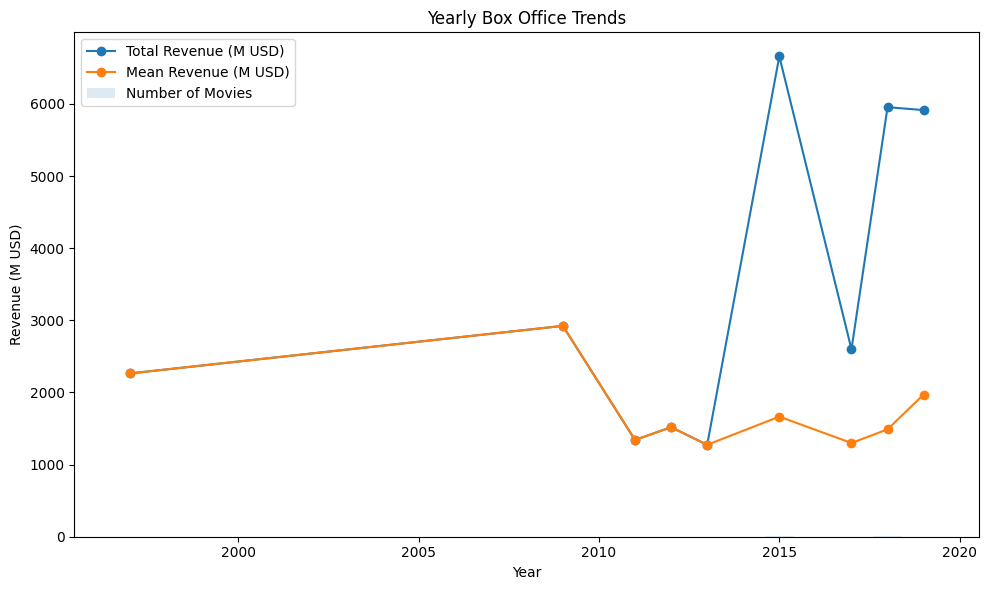

In [65]:
# 4) Yearly Trends in Box Office Performance
yearly = df.dropna(subset=['year']).groupby('year').agg(
    total_revenue=('revenue_musd', 'sum'),
    mean_revenue=('revenue_musd', 'mean'),
    movies_count=('id', 'count')
).sort_index()

plt.figure(figsize=(10,6))
plt.plot(yearly.index, yearly['total_revenue'], marker='o', label='Total Revenue (M USD)')
plt.plot(yearly.index, yearly['mean_revenue'], marker='o', label='Mean Revenue (M USD)')
plt.bar(yearly.index, yearly['movies_count'], alpha=0.15, label='Number of Movies')
plt.xlabel('Year')
plt.ylabel('Revenue (M USD)')
plt.title('Yearly Box Office Trends')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Ernest PC\AppData\Local\Temp\ipykernel_10608\3754518603.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Standalone', 'Franchise'])
C:\Users\Ernest PC\AppData\Local\Temp\ipykernel_10608\3754518603.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Standalone', 'Franchise'])


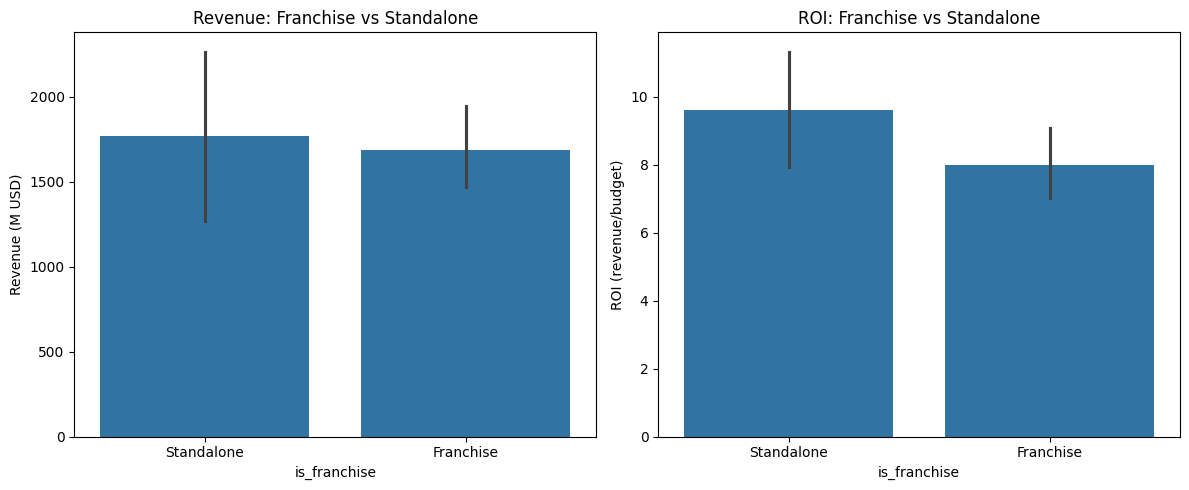

In [67]:
# 5) Comparison of Franchise vs Standalone Success
df['is_franchise'] = df['belongs_to_collection'].notna()

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=df, x='is_franchise', y='revenue_musd', ax=axes[0])
axes[0].set_xticklabels(['Standalone', 'Franchise'])
axes[0].set_title('Revenue: Franchise vs Standalone')
axes[0].set_ylabel('Revenue (M USD)')

sns.barplot(data=df[df['budget_musd'] > 0], x='is_franchise', y='roi', ax=axes[1])
axes[1].set_xticklabels(['Standalone', 'Franchise'])
axes[1].set_title('ROI: Franchise vs Standalone')
axes[1].set_ylabel('ROI (revenue/budget)')

plt.tight_layout()
plt.show()
